# Finance Data Project 

In this data project I focused on exploratory data analysis of stock prices. This project is just meant to practice my visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

____
I'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data



*[I'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader that allows me to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) 

### The Imports



In [7]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns

## Data

First need to get data using pandas datareader, the stock information for the following banks is taken:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


**  [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions this link is used(it should just be a matter of replacing certain values. Used yahoo finance as a source.
    


In [8]:
import yfinance as yf
BAC = yf.download('BAC', start = '2006-01-01', end='2016-01-01')
C = yf.download('C', start = '2006-01-01', end='2016-01-01')
GS = yf.download('GS', start = '2006-01-01', end='2016-01-01')
JPM = yf.download('JPM', start = '2006-01-01', end='2016-01-01')
MS = yf.download('MS', start = '2006-01-01', end='2016-01-01')
WFC = yf.download('WFC', start = '2006-01-01', end='2016-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
df = pd.read_pickle('all_banks')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (BAC, Open)    2517 non-null   float64
 1   (BAC, High)    2517 non-null   float64
 2   (BAC, Low)     2517 non-null   float64
 3   (BAC, Close)   2517 non-null   float64
 4   (BAC, Volume)  2517 non-null   int64  
 5   (C, Open)      2517 non-null   float64
 6   (C, High)      2517 non-null   float64
 7   (C, Low)       2517 non-null   float64
 8   (C, Close)     2517 non-null   float64
 9   (C, Volume)    2517 non-null   int64  
 10  (GS, Open)     2517 non-null   float64
 11  (GS, High)     2517 non-null   float64
 12  (GS, Low)      2517 non-null   float64
 13  (GS, Close)    2517 non-null   float64
 14  (GS, Volume)   2517 non-null   int64  
 15  (JPM, Open)    2517 non-null   float64
 16  (JPM, High)    2517 non-null   float64
 17  (JPM, Low)     2517 non-null   flo

** List of the ticker symbols (as strings) in alphabetical orderis created**

In [11]:
tickers=['BAC','C','GS','JPM','MS','WFC']


** Used pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks and set the keys argument equal to the tickers list.**

In [12]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.head(5)

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  32.956577  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  32.606567  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  32.648563  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  32.599556  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  32.620556  15619400   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   

                                                 WFC                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2006-01-03  58.310001  34.607502  5377000  31.600000  31.975000  31.195000   
2006-01-04  58.349998  34.631241  7977800  31.799999  31.820000  31.365000   
2006-01-05  58.509998  34.726200  5778000  31.500000  31.555000  31.309999   
2006-01-06  58.570000  34.761818  6889800  31.580000  31.775000  31.385000   
2006-01-09  59.189999  35.129807  4144500  31.674999  31.825001  31.555000   

                                            
                Close  Adj Close    Volume  
Date                                        
2006-01-03  31.900000  19.849182  11016400  
2006-01-04  31.530001  19.618958  10870000  
2006-01-05  31.495001  19.597183  10158000  
2006-01-06  31.680000  19.712290   8403800  
2006-01-09  31.674999  19.709183   5619600  

[5 rows x 36 columns]

** Setting the column name levels):**

In [13]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks


Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.956577  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.606567  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.648563  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.599556  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.620556  15619400   
...                ...        ...        ...        ...        ...       ...   
2015-12-24   17.320000  17.379999  17.219999  17.270000  14.910024  29369400   
2015-12-28   17.219999  17.230000  16.980000  17.129999  14.789153  41777500   
2015-12-29   17.250000  17.350000  17.160000  17.280001  14.918660  45670400   
2015-12-30   17.200001  17.240000  17.040001  17.049999  14.720088  35066400   
2015-12-31   17.010000  17.070000  16.830000  16.830000  14.530150  47153000   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   
...                 ...         ...         ...         ...  ...        ...   
2015-12-24    52.480000   52.970001   52.450001   52.709999  ...  32.439999   
2015-12-28    52.570000   52.570000   51.959999   52.380001  ...  31.950001   
2015-12-29    52.759998   53.220001   52.740002   52.980000  ...  32.330002   
2015-12-30    52.840000   52.939999   52.250000   52.299999  ...  32.200001   
2015-12-31    52.070000   52.389999   51.750000   51.750000  ...  31.770000   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  34.607502  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.631241  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.726200  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.761818  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  35.129807  4144500  31.674999  31.825001  31.555000   
...                ...        ...      ...        ...        ...        ...   
2015-12-24   32.480000  26.863762  2798200  54.970001  55.090000  54.709999   
2015-12-28   32.169998  26.607368  5420300  54.549999  54.779999  54.169998   
2015-12-29   32.549999  26.921658  6388200  55.110001  55.349998  54.990002   
2015-12-30   32.230000  26.656994  5057200  55.270000  55.310001  54.790001   
2015-12-31   31.809999  26.309616  8154300  54.509998  54.950001  54.220001   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.849182  11016400  
2006-01-04   31.530001  19.618958  10870000  
2006-01-05   31.495001  19.597183  10158000  
2006-01-06   31.680000  19.712290   8403800  
2006-01-09   31.674999  19.709183   5619600  
...                ...        ...       ...  
2015-12-24   54.820000  44.423954   4999400  
2015-12-28   54.680000  44.310509   8288800  
2015-12-29   55.290001  44.804825   7894900  
2015-12-30   54.889999  44.480679   8016900  
2015-12-31   54.360001  44.051189  10929800  

[2517 rows x 36 colu

** Checking the head of the bank_stocks dataframe.**

In [14]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.956577  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.606567  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.648563  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.599556  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.620556  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  34.607502  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.631241  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.726200  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.761818  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  35.129807  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.849182  11016400  
2006-01-04   31.530001  19.618958  10870000  
2006-01-05   31.495001  19.597183  10158000  
2006-01-06   31.680000  19.712290   8403800  
2006-01-09   31.674999  19.709183   5619600  

[5 rows x 36 columns]

# EDA

Exploring the data a bit! Before continuing,  [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
These links are used for reference to work on this project.

** Finding the max Close price for each bank's stock throughout the time period?**

In [41]:
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())
    
    #or
    
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [16]:
returns=pd.DataFrame()

** Here I used pandas pct_change() method on the Close column to create a column representing this return value by creating a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [17]:


for tick in tickers:
    returns[tick+' Return']=bank_stocks[tick]['Close'].pct_change()
    


In [18]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [20]:
did={-0.02300886942418079: 8.76991150442478,                           #this change in dictionary is used beacuse recently the
 0.008928605640421639: -0.8991071428571429,                            #data in yahoo finance is changed so for the purpose of
 0.09695019542210614: 0.08410914927768864,                             #this project old data is used by changing the recent data.
 -0.0002926052697974635: 0.011548711874444617,
 0.14322252868437624: 0.14833759590792828}
returns['C Return'].replace(did,inplace=True)

** Creating a pairplot using seaborn of the returns dataframe.Can recognize which stocks stand out.

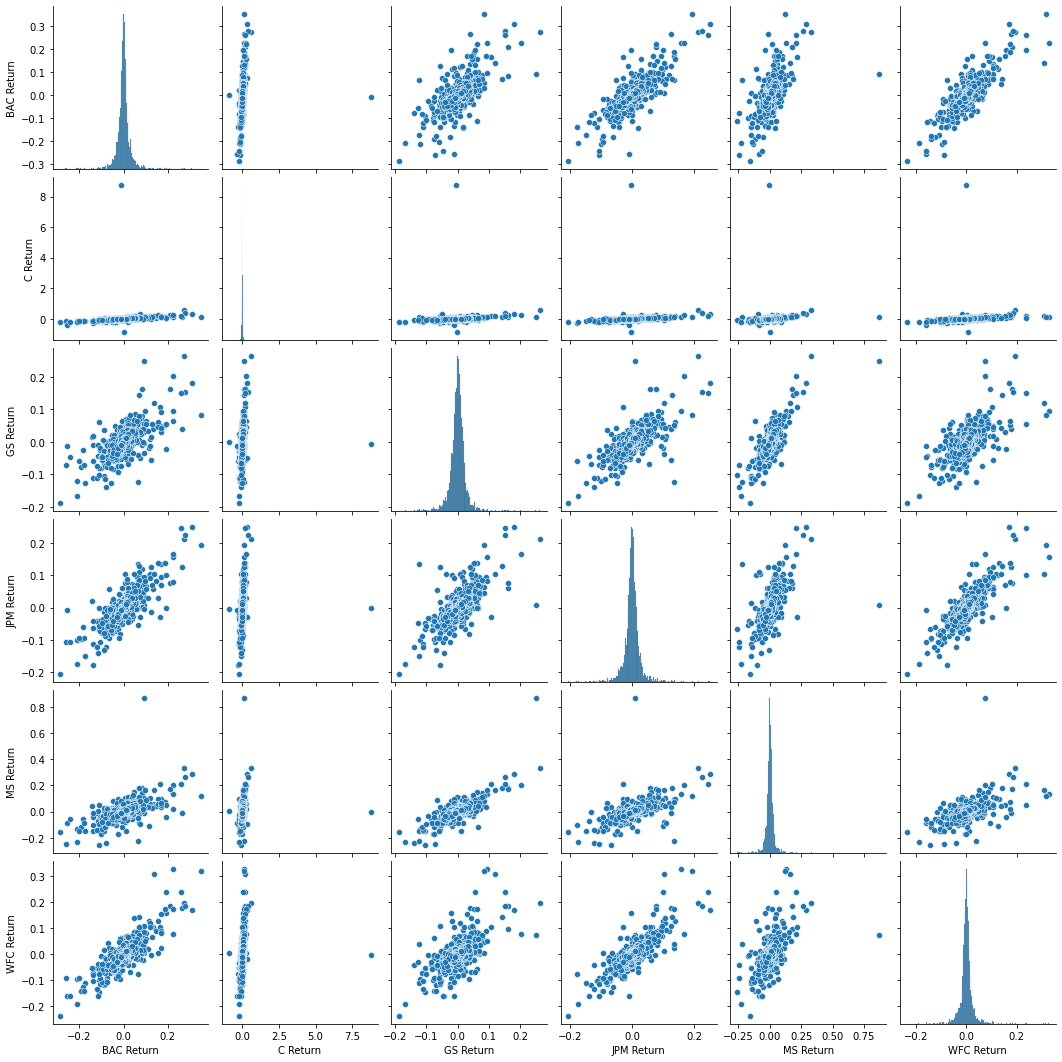

In [21]:

pairplot = sns.pairplot(returns[1:])

* Can see the difference in solution of Citigroup behavior....

** Using returns DataFrame, figuring out on what dates each bank stock had the best and worst single day returns.

In [22]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** Came to know that Citigroup's largest drop and biggest gain were very close to one another.

In [23]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Took a look at the standard deviation of the returns, to check which stock classify as the riskiest over the entire time period and  Which would  classify as the riskiest for the year 2015?**

In [24]:
returns.std()

BAC Return    0.036647
C Return      0.179968
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [25]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Creating a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

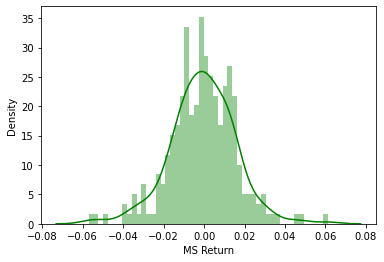

In [26]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=50)

** Creating a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

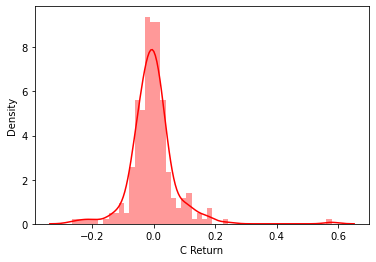

In [27]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=50)

____
# More Visualization
Used visualization libraries sucha as seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#  Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Creating a line plot showing Close price for each bank for the entire index of time. ( [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) )**

<AxesSubplot:xlabel='Date'>

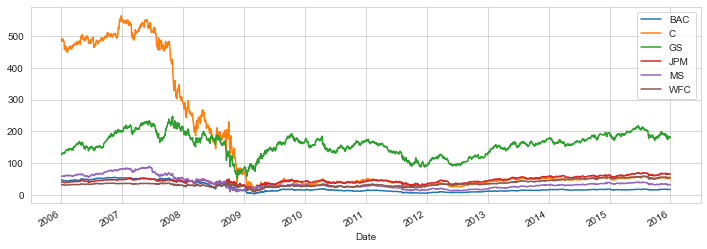

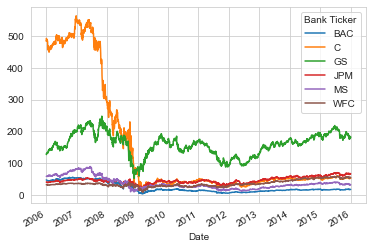

In [29]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

#or

bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

Creating the same line plot using plotly and cufflinks by using iplot

In [30]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Anlyzing the moving averages for these stocks in the year 2008. 

** Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

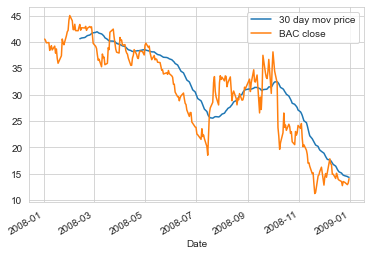

In [31]:
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day mov price')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC close')
plt.legend()

** Creating a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

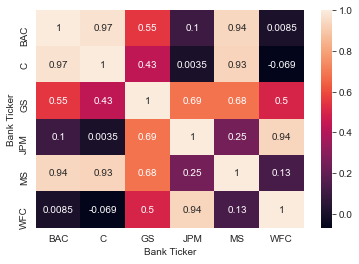

In [32]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Using seaborn's clustermap to cluster the correlations together:**

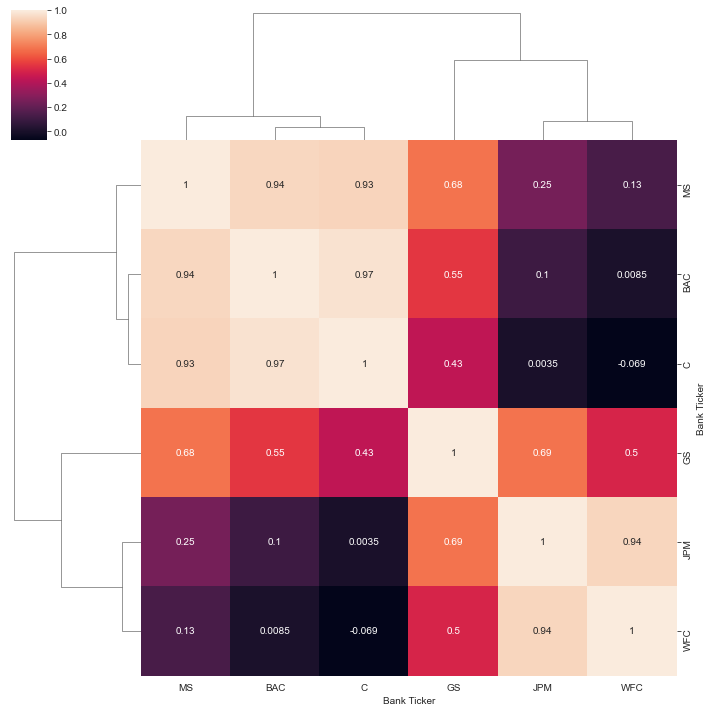

In [33]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)



From this I relied on the cufflinks library to create some Technical Analysis plots. 

** Creating a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [34]:
bac15=BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

** Creating a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [62]:

MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')
data = MS['Close'].loc['2015-01-01':'2016-01-01']

# Calculating the SMAs






**Creating a Bollinger Band Plot for Bank of America for the year 2015.**

In [35]:

MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll',periods=[13,21,55],title='Simple Moving Averages')
data = MS['Close'].loc['2015-01-01':'2016-01-01']